In [1]:
%load_ext rpy2.ipython

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

from src.general import *
from src.eda import *

root = get_git_root()
paths = set_paths('transfer')
path = paths['outputs']

Using TensorFlow backend.


In [2]:
%%R
library(tidyverse)
library(here)
library(patchwork)
library(viridis)

cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
my_pal <- c("#000000", "#0072B2", "#E69F00",  "#D55E00", "#F0E442", "#56B4E9", "#009E73", "#CC79A7")

chosen_palette = cbbPalette
theme_set(theme_bw())
#theme_set(theme_linedraw())

save_plot = function(fig_name, folder='figures', sub_folder='transfer', width=5, height=3, dpi=600){
    ggsave(here(folder, sub_folder, paste(fig_name, 'pdf', sep='.')), width = width, height = height, dpi=dpi)
    ggsave(here(folder, sub_folder, paste(fig_name, 'png', sep='.')), width = width, height = height, dpi=dpi)
           }
           
width = 5
height = 3
dpi = 600

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: here() starts at /Users/johannes/work/eco_transfer

R[write to console]: Loading required package: viridisLite



## Trained from scratch

In [3]:
config = configure_defaults()
show(config)

,value
n_species,16
min_species,2
species_order,abundance
training_data,petrer_limestone
testing_data,petrer_limestone
training_start,train_from_scratch
val_split,0.5
reconstruction_loss,bce
depth,32
n_latent,16


In [4]:
try:
    scratch = pd.read_csv(path / 'train_from_random.csv')
except FileNotFoundError:
    from src.vae import *
    scratch = compare_training(config)
    scratch.to_csv(path / 'train_from_random.csv', index=False)
    
scratch

,dummy,n_species,min_species,species_order,training_data,testing_data,training_start,val_split,reconstruction_loss,depth,...,n_tile,n_colors,fully_connected,testing,chunk_size,train_size,val_size,checkpoint_path,pix_err,patch_err
0,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.008319,0.093897
1,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.006910,0.078873
2,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.006764,0.081690
3,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.003250,0.043192
4,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.004130,0.044131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,dummy,16,2,abundance,mexico_all,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,420,420,/Users/johannes/work/resecarin/models/bce/val_...,0.047656,0.438095
94,dummy,16,2,abundance,mexico_all,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,420,420,/Users/johannes/work/resecarin/models/bce/val_...,0.048810,0.447619
95,dummy,16,2,abundance,mexico_all,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,420,420,/Users/johannes/work/resecarin/models/bce/val_...,0.009635,0.116667
96,dummy,16,2,abundance,mexico_all,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,420,420,/Users/johannes/work/resecarin/models/bce/val_...,0.010193,0.109524


/Users/johannes/opt/anaconda3/envs/eco_transfer/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


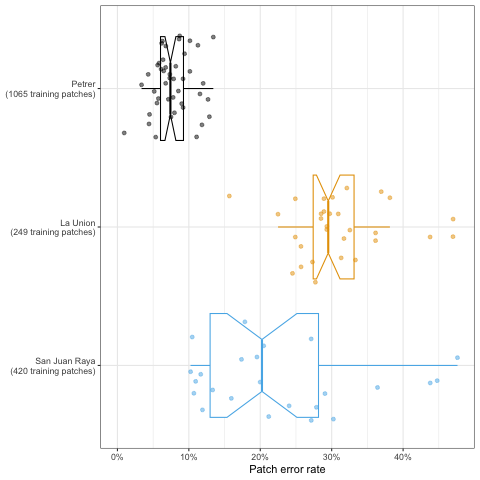

In [5]:
%%R -i scratch

breaks = c('petrer_limestone', 'union_patches', 'mexico_all')
labels = c('Petrer\n(1065 training patches)', 'La Union\n(249 training patches)', 'San Juan Raya\n(420 training patches)')
err = 'Patch error rate'

p = scratch %>% as_tibble() %>% mutate(testing_data=factor(testing_data, breaks)) %>%
        ggplot(aes(x=testing_data, y=patch_err, color=testing_data)) +
        geom_boxplot(notch=TRUE, show.legend = FALSE, outlier.shape=NA) +
        geom_jitter(alpha=.5, show.legend = FALSE) +
        scale_color_manual(values=chosen_palette, breaks=breaks, labels=labels) +
        scale_y_continuous(labels=scales::percent, limits=c(0,NA)) +
        coord_flip() +
        scale_x_discrete(limits=rev, breaks = breaks, labels = labels) +
        labs(x=NULL, y=err
            )
        
save_plot(fig_name='train_from_random')

p

## Phylo split into chunks

In [6]:
config = configure_defaults()
config['testing_data'] = 'union_patches'
config['testing_data'] = 'mexico_all'

config['species_order'] = 'phylogeny'
show(config)

,value
n_species,16
min_species,2
species_order,phylogeny
training_data,petrer_limestone
testing_data,mexico_all
training_start,train_from_scratch
val_split,0.5
reconstruction_loss,bce
depth,32
n_latent,16


In [7]:
try:
    phylo_chunks = pd.read_csv(path / 'phylo_chunks.csv')
    
except FileNotFoundError:
    from src.vae import *
    results = pd.DataFrame()

    for testing_location in ['union_patches', 'mexico_all'][1:]:

        for chunk_size in tqdm(range(0,17)):
            config['chunk_size'] = chunk_size
            config['testing_data'] = 'phylo_' + testing_location + '_chunk_size='+str(chunk_size)
            config['testing_location'] = testing_location
            results = pd.concat([results, evaluate_checkpoints(config, detailed_validation=False)], ignore_index=True)
        
    phylo_chunks = results
    phylo_chunks.to_csv(path / 'phylo_chunks.csv', index=None)
    
phylo_chunks

,dummy,n_species,min_species,species_order,training_data,testing_data,training_start,val_split,reconstruction_loss,depth,...,n_colors,fully_connected,testing,chunk_size,train_size,val_size,checkpoint_path,pix_err,patch_err,testing_location
0,dummy,16,2,phylogeny,petrer_limestone,phylo_union_patches_chunk_size=0,train_from_scratch,0.5,bce,32,...,1,False,False,0,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.024316,0.234940,union_patches
1,dummy,16,2,phylogeny,petrer_limestone,phylo_union_patches_chunk_size=0,train_from_scratch,0.5,bce,32,...,1,False,False,0,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.024081,0.218876,union_patches
2,dummy,16,2,phylogeny,petrer_limestone,phylo_union_patches_chunk_size=0,train_from_scratch,0.5,bce,32,...,1,False,False,0,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.016864,0.200803,union_patches
3,dummy,16,2,phylogeny,petrer_limestone,phylo_union_patches_chunk_size=0,train_from_scratch,0.5,bce,32,...,1,False,False,0,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.014244,0.168675,union_patches
4,dummy,16,2,phylogeny,petrer_limestone,phylo_union_patches_chunk_size=0,train_from_scratch,0.5,bce,32,...,1,False,False,0,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.016676,0.170683,union_patches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,dummy,16,2,phylogeny,petrer_limestone,phylo_mexico_all_chunk_size=16,train_from_scratch,0.5,bce,32,...,1,False,False,16,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.018555,0.188095,mexico_all
2036,dummy,16,2,phylogeny,petrer_limestone,phylo_mexico_all_chunk_size=16,train_from_scratch,0.5,bce,32,...,1,False,False,16,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.019457,0.245238,mexico_all
2037,dummy,16,2,phylogeny,petrer_limestone,phylo_mexico_all_chunk_size=16,train_from_scratch,0.5,bce,32,...,1,False,False,16,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.014695,0.160714,mexico_all
2038,dummy,16,2,phylogeny,petrer_limestone,phylo_mexico_all_chunk_size=16,train_from_scratch,0.5,bce,32,...,1,False,False,16,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.020173,0.225000,mexico_all


/Users/johannes/opt/anaconda3/envs/eco_transfer/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


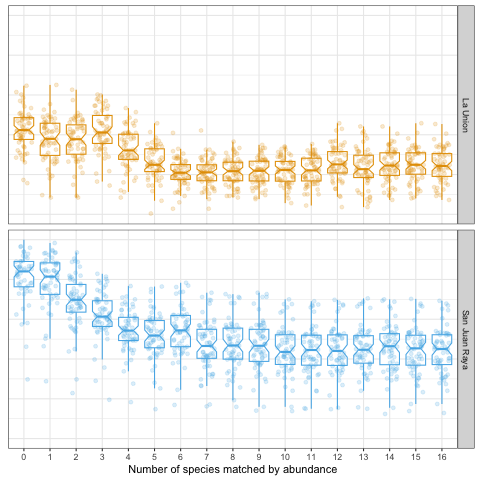

In [8]:
%%R -i phylo_chunks

cat_order = c('Petrer', 'La Union', 'San Juan Raya')

p0 = phylo_chunks %>% as_tibble()  %>%
    mutate(chunk_size=factor(chunk_size)) %>%
    mutate(testing_location = recode(testing_location, "union_patches" = "La Union", "mexico_all" = "San Juan Raya")) %>%
    mutate(Location = factor(testing_location, cat_order)) %>%
        ggplot(aes(x=chunk_size, y=patch_err, color=testing_location)) +
        geom_boxplot(notch=TRUE, outlier.shape=NA, show.legend=FALSE) +
        geom_jitter(width=.3, alpha=.2, show.legend=FALSE) +
        scale_y_continuous(labels=scales::percent, limits=c(0,0.5)) +
        scale_color_manual(values=chosen_palette, breaks=cat_order, labels=cat_order) +
        labs(x='Number of species matched by abundance',
             y=NULL,
            ) +
        facet_grid(testing_location~.) +
        theme(
            axis.text.y = element_blank(),
            axis.ticks.y = element_blank()
        )

        
p0

`summarise()` has grouped output by 'testing_location', 'checkpoint_path'. You
can override using the `.groups` argument.
`summarise()` has grouped output by 'testing_location', 'chunk_size'. You can
override using the `.groups` argument.


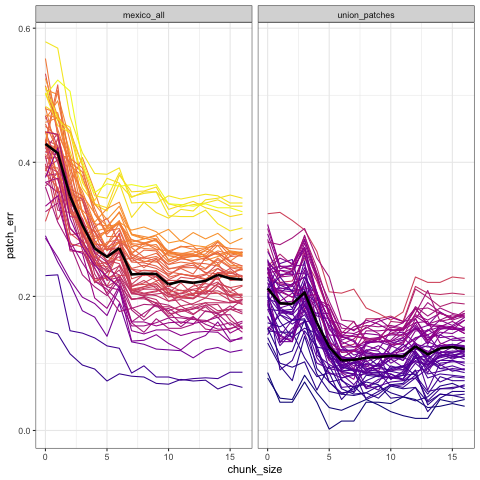

In [9]:
%%R

p = phylo_chunks %>% as_tibble() %>%
    group_by(testing_location, checkpoint_path) %>%
    summarize(index = median(patch_err), across()) %>%
    ungroup() %>%
    group_by(testing_location, chunk_size) %>%
    summarize(median_err = median(patch_err), across()) %>%
    ggplot(aes(x=chunk_size, y=patch_err)) +
    # scale_x_discrete(labels = seq(0,16)) + 
    geom_line(aes(group=checkpoint_path, color=index), show.legend=FALSE) +
    geom_line(aes(y=median_err), size=1.2) +
    facet_wrap(~testing_location) +
    # geom_boxplot(aes(x=factor(chunk_size))) +
    scale_color_viridis(option="plasma")

save_plot('paired_chunks')

p


`summarise()` has grouped output by 'testing_location', 'chunk_size'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'testing_location', 'chunk_size'. You can
override using the `.groups` argument.


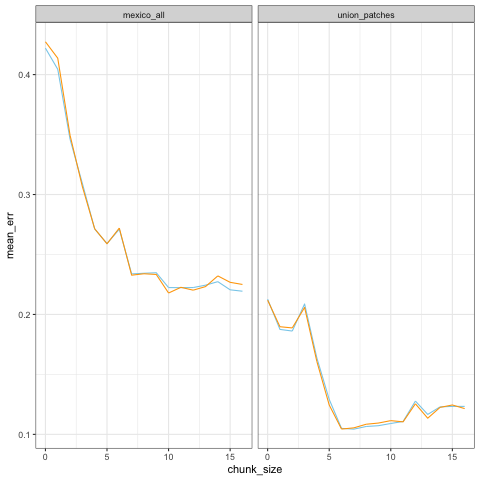

In [10]:
%%R

phylo_chunks %>% as_tibble() %>%
    group_by(testing_location, chunk_size) %>%
    summarize(mean_err = mean(patch_err), across()) %>%
    summarize(median_err = median(patch_err), across()) %>%
    ggplot(aes(x=chunk_size)) +
    geom_line(aes(y=mean_err), color='skyblue') +
    geom_line(aes(y=median_err), color='orange') +
    facet_wrap(~testing_location)

In [11]:
%%R

phylo_chunks %>% as_tibble() %>%
    filter(testing_location == 'mexico_all') %>%
    group_by(chunk_size) %>%
    summarize(median_err = median(patch_err),
             mean_err = mean(patch_err)
             )

# A tibble: 17 × 3
   chunk_size median_err mean_err
        <int>      <dbl>    <dbl>
 1          0      0.427    0.422
 2          1      0.414    0.404
 3          2      0.349    0.346
 4          3      0.307    0.309
 5          4      0.271    0.271
 6          5      0.259    0.259
 7          6      0.272    0.271
 8          7      0.233    0.234
 9          8      0.234    0.234
10          9      0.233    0.235
11         10      0.218    0.222
12         11      0.223    0.222
13         12      0.220    0.222
14         13      0.223    0.224
15         14      0.232    0.227
16         15      0.227    0.221
17         16      0.225    0.219


In [12]:
res = phylo_chunks[phylo_chunks['testing_location'] == 'mexico_all']
res = res[['chunk_size', 'checkpoint_path', 'patch_err']].pivot(index=['checkpoint_path'], columns=['chunk_size'])
res.iloc[:, [10,16]].agg(['mean', 'median']).T

mean    median
          chunk_size                    
patch_err 10          0.222401  0.217857
          16          0.219365  0.225000

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, kruskal, ttest_rel, wilcoxon

def run_tests(phylo_chunks : pd.DataFrame,
              testing_location : str = 'union_patches',
              columns : list = [6, 16]
              ):
    
    print(f'\n\nTesting location: {testing_location}')
    
    res = phylo_chunks[phylo_chunks['testing_location'] == testing_location]
    res = res[['chunk_size', 'checkpoint_path', 'patch_err']].pivot(index=['checkpoint_path'], columns=['chunk_size'])
    # res = res.droplevel(0, axis=1)
    data1 = res.iloc[:, columns[0]]
    data2 = res.iloc[:, columns[1]]

#     print('\nResults of unpaired tests:\n')

#     stat, p = ttest_ind(data1, data2, equal_var=False, alternative='less')
#     print(f"p={p:.1e} (stat={stat}) for unpaired Student's t-test")

#     stat, p = mannwhitneyu(data1, data2, alternative='less')
#     print(f'p={p:.1e} (stat={stat}) for Mann-Whitney U-test')

#     stat, p = kruskal(data1, data2)
#     print(f'p={p:.1e} (stat={stat}) for Kruskal-Wallis H-test')

    print('\n\nResults of paired tests:\n')
    
    stat, p = ttest_rel(data1, data2, alternative='greater')
    print(f"p={p:.1e} (stat={stat}) for paired Student's t-test")
    
    stat, p = wilcoxon(data1, data2, alternative='greater')
    print(f'p={p:.1e} (stat={stat}) for Wilcoxon signed-rank test')


run_tests(phylo_chunks, 'union_patches', [6, 16])
run_tests(phylo_chunks, 'mexico_all', [10, 16])
run_tests(phylo_chunks, 'mexico_all', [11, 16])
run_tests(phylo_chunks, 'mexico_all', [12, 16])
run_tests(phylo_chunks, 'mexico_all', [13, 16])
run_tests(phylo_chunks, 'mexico_all', [14, 16])
run_tests(phylo_chunks, 'mexico_all', [15, 16])
run_tests(phylo_chunks, 'mexico_all', [16, 16])


## Direct transfer baseline using random ordering

In [21]:
try:
    direct_transfer_baseline = pd.read_csv(path / 'direct_transfer_baseline.csv')
    
except FileNotFoundError:
    from src.vae import *
    config = configure_defaults()
    config['species_order'] = 'random'

    results = pd.DataFrame()

    for testing_data in ['union_patches', 'mexico_all']:
        config['testing_data'] = testing_data
        results = pd.concat([results, evaluate_checkpoints(config, detailed_validation=False)], ignore_index=True)
        
    direct_transfer_baseline = results
    direct_transfer_baseline.to_csv( path / 'direct_transfer_baseline.csv', index=None)

direct_transfer_baseline


,dummy,n_species,min_species,species_order,training_data,testing_data,training_start,val_split,reconstruction_loss,depth,...,n_tile,n_colors,fully_connected,testing,chunk_size,train_size,val_size,checkpoint_path,pix_err,patch_err
0,dummy,16,2,random,petrer_limestone,union_patches,train_from_scratch,0.5,bce,32,...,8,1,False,False,16,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.036160,0.331325
1,dummy,16,2,random,petrer_limestone,union_patches,train_from_scratch,0.5,bce,32,...,8,1,False,False,16,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.019876,0.244980
2,dummy,16,2,random,petrer_limestone,union_patches,train_from_scratch,0.5,bce,32,...,8,1,False,False,16,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.021398,0.194779
3,dummy,16,2,random,petrer_limestone,union_patches,train_from_scratch,0.5,bce,32,...,8,1,False,False,16,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.021790,0.220884
4,dummy,16,2,random,petrer_limestone,union_patches,train_from_scratch,0.5,bce,32,...,8,1,False,False,16,498,498,/Users/johannes/work/resecarin/models/bce/val_...,0.024708,0.281124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,dummy,16,2,random,petrer_limestone,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,16,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.043545,0.427381
116,dummy,16,2,random,petrer_limestone,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,16,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.039732,0.410714
117,dummy,16,2,random,petrer_limestone,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,16,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.021810,0.245238
118,dummy,16,2,random,petrer_limestone,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,16,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.023912,0.283333


/Users/johannes/opt/anaconda3/envs/eco_transfer/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


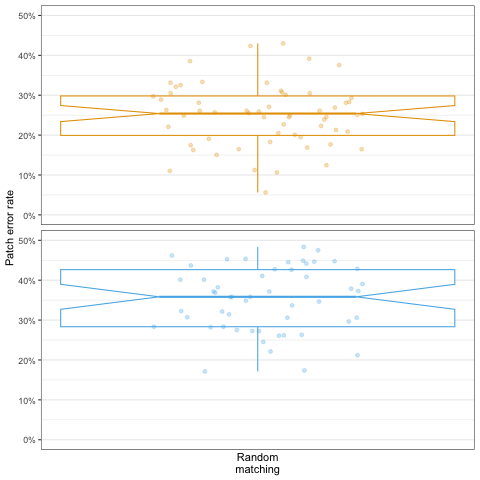

In [ ]:
%%R -i direct_transfer_baseline

p3 = direct_transfer_baseline %>% as_tibble() %>%
    mutate(location = recode(testing_data, "union_patches" = "La Union", "mexico_all" = "San Juan Raya")) %>%
    mutate(location = factor(location, cat_order)) %>%
    ggplot(aes(x=0 , y=patch_err, color=location)) +
    geom_boxplot(notch=TRUE, outlier.shape=NA, show.legend=FALSE) +
    geom_jitter(width=.2, alpha = .3, show.legend=FALSE) +
    scale_y_continuous(labels=scales::percent, limits=c(0,.5)) +
    scale_x_continuous(breaks=NULL) +
    scale_color_manual(values=chosen_palette, breaks=cat_order, labels=cat_order) +
    labs(x='Random\nmatching',
         y='Patch error rate') +
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    ) +
    facet_grid(location~.) +
    theme(
      strip.background = element_blank(),
      strip.text = element_blank()
    )
    
p3

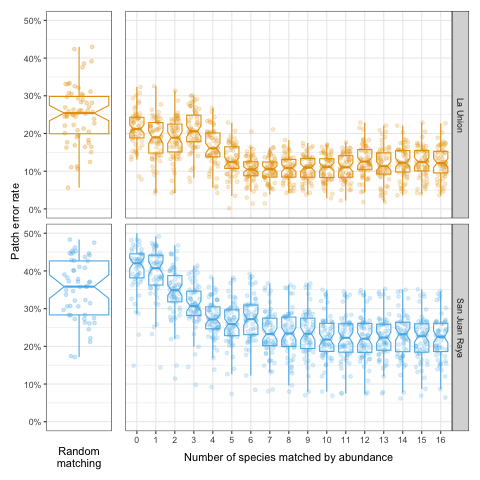

In [ ]:
%%R

p = p3 + p0 + plot_layout(widths = c(1, 5))#, heights = c(1, 1))

save_plot('phylo_abundance_random', width=7, height=7)
p


## Direct transfer to various locations

In [ ]:
try:
    direct = pd.read_csv(path / 'direct.csv')
except FileNotFoundError:
    config = configure_defaults()
    config['species_order'] = 'abundance'
    direct = compare_on_datasets(config, ['petrer_limestone', 'union_patches', 'mexico_all'])
    direct.to_csv(path / 'direct.csv', index=None)
    
direct

,dummy,n_species,min_species,species_order,training_data,testing_data,training_start,val_split,reconstruction_loss,depth,...,n_tile,n_colors,fully_connected,testing,chunk_size,train_size,val_size,checkpoint_path,pix_err,patch_err
0,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.007820,0.088263
1,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.006705,0.076995
2,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.007204,0.082629
3,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.003440,0.048826
4,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.004350,0.045070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,dummy,16,2,abundance,petrer_limestone,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.015709,0.188095
128,dummy,16,2,abundance,petrer_limestone,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.018787,0.192857
129,dummy,16,2,abundance,petrer_limestone,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.015188,0.166667
130,dummy,16,2,abundance,petrer_limestone,mexico_all,train_from_scratch,0.5,bce,32,...,8,1,False,False,1,840,840,/Users/johannes/work/resecarin/models/bce/val_...,0.019029,0.214286


In [ ]:
%%R
breaks = c('petrer_limestone', 'union_patches', 'mexico_all')
labels = c('Petrer', 'La Union', 'San Juan Raya')
err = 'Patch error rate'
direct = c('Petrer', 'La Union', 'San Juan Raya')
linetypes=c("solid", "longdash", "dotted")

/Users/johannes/opt/anaconda3/envs/eco_transfer/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


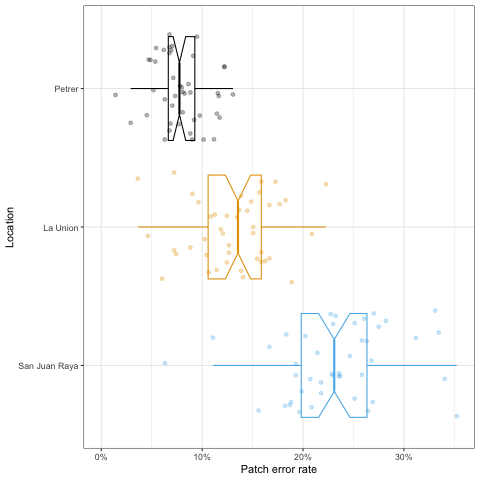

In [ ]:
%%R -i direct

p = direct %>% as_tibble() %>%
        mutate(testing_data=factor(testing_data, breaks)) %>%
        group_by(testing_data) %>%
        ggplot(aes(x=testing_data, y=patch_err, color=testing_data)) +
        geom_boxplot(notch=TRUE, outlier.shape=NA, show.legend = FALSE) +
        geom_jitter(alpha=.3, show.legend = FALSE) +
        scale_color_manual(values=chosen_palette, breaks=breaks, labels=labels) +
        scale_y_continuous(labels=scales::percent, limits=c(0,NA)) +
        coord_flip() +
        scale_x_discrete(limits=rev, breaks = breaks, labels = labels) +
        labs(x="Location", y=err)
        
save_plot('direct_transfer')

p

## Fine-tuning

In [ ]:
try:
    tuning = pd.read_csv(path / 'tuning.csv')
except FileNotFoundError:
    config = configure_defaults()
    tuning = compare_transfer(config)
    tuning.to_csv(path / 'tuning.csv', index=None)

tuning

,dummy,n_species,min_species,species_order,training_data,testing_data,training_start,val_split,reconstruction_loss,depth,...,n_colors,fully_connected,testing,chunk_size,model_type,train_size,val_size,checkpoint_path,pix_err,patch_err
0,dummy,16,2,abundance,union_patches,union_patches,train_from_scratch,0.5,bce,32,...,1,False,False,1,Training from scratch,249,249,/Users/johannes/work/resecarin/models/bce/val_...,0.033729,0.301205
1,dummy,16,2,abundance,union_patches,union_patches,train_from_scratch,0.5,bce,32,...,1,False,False,1,Training from scratch,249,249,/Users/johannes/work/resecarin/models/bce/val_...,0.057668,0.461847
2,dummy,16,2,abundance,union_patches,union_patches,train_from_scratch,0.5,bce,32,...,1,False,False,1,Training from scratch,249,249,/Users/johannes/work/resecarin/models/bce/val_...,0.025477,0.265060
3,dummy,16,2,abundance,union_patches,union_patches,train_from_scratch,0.5,bce,32,...,1,False,False,1,Training from scratch,249,249,/Users/johannes/work/resecarin/models/bce/val_...,0.029681,0.244980
4,dummy,16,2,abundance,union_patches,union_patches,train_from_scratch,0.5,bce,32,...,1,False,False,1,Training from scratch,249,249,/Users/johannes/work/resecarin/models/bce/val_...,0.033917,0.297189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,dummy,16,2,abundance,mexico_all,mexico_all,tune_petrer_limestone,0.5,bce,32,...,1,False,False,1,Fine-tuning Petrer model,420,420,/Users/johannes/work/resecarin/models/bce/val_...,0.009431,0.116667
182,dummy,16,2,abundance,mexico_all,mexico_all,tune_petrer_limestone,0.5,bce,32,...,1,False,False,1,Fine-tuning Petrer model,420,420,/Users/johannes/work/resecarin/models/bce/val_...,0.011496,0.142857
183,dummy,16,2,abundance,mexico_all,mexico_all,tune_petrer_limestone,0.5,bce,32,...,1,False,False,1,Fine-tuning Petrer model,420,420,/Users/johannes/work/resecarin/models/bce/val_...,0.017578,0.197619
184,dummy,16,2,abundance,mexico_all,mexico_all,tune_petrer_limestone,0.5,bce,32,...,1,False,False,1,Fine-tuning Petrer model,420,420,/Users/johannes/work/resecarin/models/bce/val_...,0.001562,0.026190


/Users/johannes/opt/anaconda3/envs/eco_transfer/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


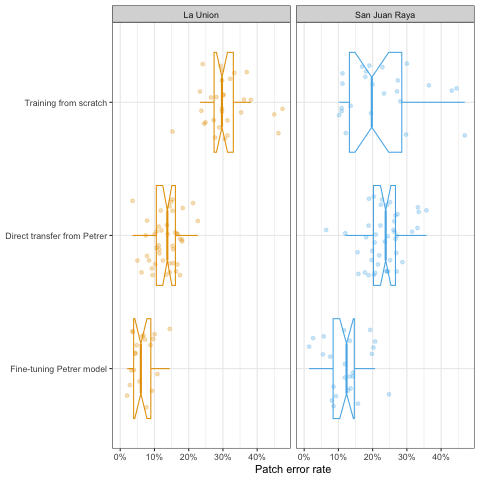

In [ ]:
%%R -i tuning

data = 'testing_data'
err = 'patch_err'
var = 'model_type'

legend_order = c('Fine-tuning Petrer model', 'Direct transfer from Petrer', 'Training from scratch')

p = tuning %>% as_tibble()  %>%
    mutate(model_type = factor(model_type, legend_order)) %>%
    mutate(testing_data = recode(testing_data, "petrer_limestone" = "Petrer", "union_patches" = "La Union", "mexico_all" = "San Juan Raya")) %>%
    mutate(testing_data = factor(testing_data, labels)) %>%
        ggplot(aes_string(x=var, y=err, color=data)) +
        geom_boxplot(notch=TRUE, outlier.shape=NA, show.legend = FALSE) +
        geom_jitter(alpha=.3, width=.3, show.legend = FALSE) +
        scale_y_continuous(labels=scales::percent, limits=c(0,NA)) +
        scale_color_manual(values=chosen_palette, breaks=labels, labels=labels) +
        facet_grid(.~testing_data) +
        coord_flip() +
        labs(y='Patch error rate',
             x=NULL)
        
save_plot(fig_name='tuning', width=7)

p

## Size of training set

In [ ]:
paths = set_paths('transfer')

try:
    train_size = pd.read_csv(paths['outputs'] / 'train_size.csv')
except FileNotFoundError:
    config = configure_defaults()
    train_size = compare_models(config, var = 'val_split', var_values = np.arange(0.50, 1, .01))
    train_size.to_csv(paths['data'] / 'train_size.csv', index=None)
    
train_size

,dummy,n_species,min_species,species_order,training_data,testing_data,training_start,val_split,reconstruction_loss,depth,...,n_tile,n_colors,fully_connected,testing,chunk_size,train_size,val_size,checkpoint_path,pix_err,patch_err
0,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.50,bce,32,...,8,1,False,False,1,1065,1065,/Users/johannes/work/resecarin/models/bce/val_...,0.007923,0.089202
1,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.51,bce,32,...,8,1,False,False,1,1044,1086,/Users/johannes/work/resecarin/models/bce/val_...,0.008446,0.096685
2,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.52,bce,32,...,8,1,False,False,1,1022,1108,/Users/johannes/work/resecarin/models/bce/val_...,0.008151,0.096570
3,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.53,bce,32,...,8,1,False,False,1,1001,1129,/Users/johannes/work/resecarin/models/bce/val_...,0.005128,0.061116
4,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.54,bce,32,...,8,1,False,False,1,980,1150,/Users/johannes/work/resecarin/models/bce/val_...,0.006698,0.083478
5,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.55,bce,32,...,8,1,False,False,1,958,1172,/Users/johannes/work/resecarin/models/bce/val_...,0.007559,0.087884
6,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.56,bce,32,...,8,1,False,False,1,937,1193,/Users/johannes/work/resecarin/models/bce/val_...,0.005913,0.064543
7,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.57,bce,32,...,8,1,False,False,1,916,1214,/Users/johannes/work/resecarin/models/bce/val_...,0.008173,0.092257
8,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.58,bce,32,...,8,1,False,False,1,895,1235,/Users/johannes/work/resecarin/models/bce/val_...,0.003922,0.052632
9,dummy,16,2,abundance,petrer_limestone,petrer_limestone,train_from_scratch,0.59,bce,32,...,8,1,False,False,1,873,1257,/Users/johannes/work/resecarin/models/bce/val_...,0.001728,0.019889


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


/Users/johannes/opt/anaconda3/envs/eco_transfer/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


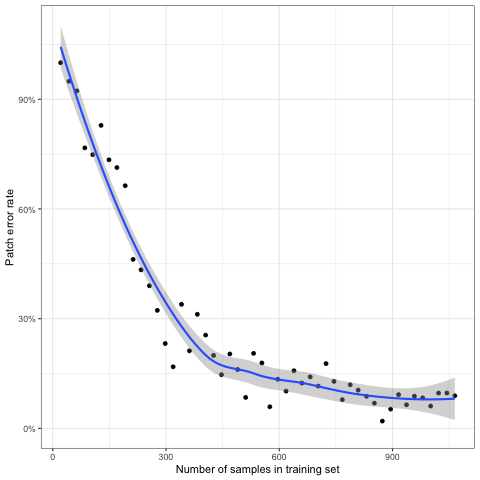

In [ ]:
%%R -i train_size

data = 'testing_data'
err = 'patch_err'
var = 'train_size'

p = train_size %>% as_tibble()  %>%
        ggplot(aes_string(x=var, y=err)) +
        geom_point() +
        geom_smooth() +
        scale_y_continuous(labels=scales::percent, limits=c(0,NA)) +
        labs(y='Patch error rate',
             x='Number of samples in training set'
            )
        
save_plot(fig_name='train_size', width=4)

p

## Communities populations

In [ ]:
var = 'Location'

df = pd.DataFrame()

for key in [['petrer_limestone','Petrer'], ['union_patches','La Union'], ['mexico_all', 'San Juan Raya']]:
    paths = set_paths(key[0])
    data_tag = key[0]
    name = key[1] 
    csvs = [p for p in paths['outputs'].glob( '*.csv')]
    temp = pd.read_csv(csvs[0])
    temp.columns = range(1,config['n_species']+1)
    temp.insert(0, 'Location', name)
    df = pd.concat([df, temp], ignore_index=True)

grouped = df.groupby('Location')

populations = (grouped
               .apply(lambda x: x.drop(var, axis=1)
                      .sum(axis=1)
                      .value_counts(ascending=False, normalize=True))
               .to_frame(name='Abundance')
               .reset_index(names=[var,'Species per patch'])
               .sort_values('Species per patch')
)

populations

,Fumana_thymifolia,Stipa_tenacissima,Helianthemum_violaceum,Brachypodium_retusum,Fumana_ericoides,Rosmarinus_officinalis,Helianthemum_syriacum,Teucrium_capitatum,Atractylis_cancellata,Teucrium_pseudochamaepitys,Phagnalon_rupestre,Teucrium_mola,Fumana_hispidula,Sedum_sediforme,Matthiola_fruticulosa,Thymus_vulgaris
0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2126,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False
2127,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False
2128,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False


,Helichrysum stoechas,Piptatherum miliaceum,Hyparrhenia sinaica,Reichardia tingitana,Dittrichia viscosa,Sonchus tenerrimus,Linum strictum,Pinus halepensis,Leontodon longirostris,Phagnalon saxatile,Plantago crassifolia,Fagonia cretica,Atriplex halimus,Lygeum spartum,Paronychia suffruticosa,Limonium carthaginense
0,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,True,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False
494,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False
495,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
496,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


,Bouteloa_gracilis,Neobuxbaumia_mezcalaensis,Lippia_graveolens,Yucca_periculosa,Calliandra_eriophylla,Aeschinomene_compacta,Echinopterix_eglandulosa,Ruelia,Ipomea_sp,Lantana_achirantifolia,Justicia_mexicana,Ruelia_hirsutoglandulosa,Cnidosculus_tehuacanensis,Opuntia_decumbens,hechtia,Hibiscus
0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
836,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
837,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
838,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0


,Location,Species per patch,Abundance
0,La Union,2,0.405622
22,San Juan Raya,2,0.163095
9,Petrer,2,0.483568
1,La Union,3,0.236948
20,San Juan Raya,3,0.207143
10,Petrer,3,0.209390
2,La Union,4,0.168675
19,San Juan Raya,4,0.228571
11,Petrer,4,0.118779
3,La Union,5,0.086345


In [ ]:
linears = grouped.mean().reset_index().melt(id_vars=var, var_name='Species', value_name='Abundance')

linears = linears.assign(Species = linears.Species.astype('int'))
linears#to_numeric())

,Location,Species,Abundance
0,La Union,1,248.500000
1,Petrer,1,0.501408
2,San Juan Raya,1,0.741667
3,La Union,2,0.562249
4,Petrer,2,0.400469
5,San Juan Raya,2,0.567857
6,La Union,3,0.528112
7,Petrer,3,0.313146
8,San Juan Raya,3,0.396429
9,La Union,4,0.307229


/Users/johannes/opt/anaconda3/envs/eco_transfer/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


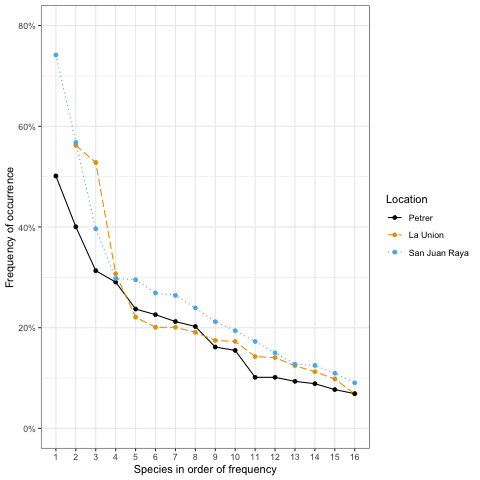

In [ ]:
%%R -i linears

label = 'Location'

cat_order = c('Petrer', 'La Union', 'San Juan Raya')
linetypes=c("solid", "longdash", "dotted")

p2 = linears %>% as_tibble() %>% mutate(Location = factor(Location, cat_order)) %>%
    ggplot(aes(x=Species, y=Abundance, color=Location, linetype=Location)) +
    geom_line() +
    geom_point() +
    scale_color_manual(values=chosen_palette) +
    scale_linetype_manual(values=linetypes) +
    scale_y_continuous(labels=scales::percent, limits=c(0, .8)) +
    scale_x_continuous(breaks=seq(16), minor_breaks=NULL) +
    labs(x='Species in order of frequency', y='Frequency of occurrence')

p2

/Users/johannes/opt/anaconda3/envs/eco_transfer/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


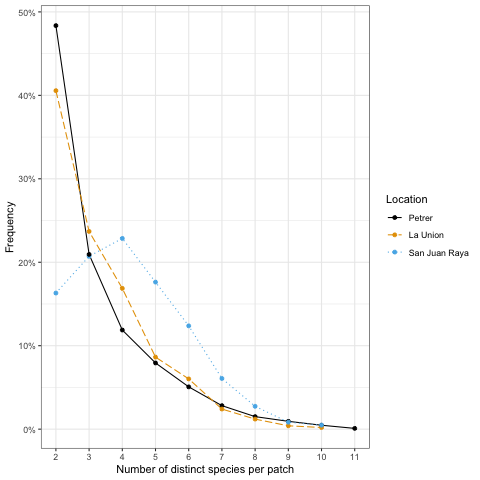

In [ ]:
%%R -i populations

p1 = populations %>% as_tibble() %>%
    mutate(Location = factor(Location, cat_order)) %>%
    ggplot(aes(x=`Species per patch`, y=Abundance, color=Location, linetype=Location)) +
    geom_line() +
    geom_point() +
    scale_color_manual(values=chosen_palette) +
    scale_linetype_manual(values=linetypes) +
    scale_y_continuous(labels=scales::percent) +
    labs(x = 'Number of distinct species per patch', y = 'Frequency') +
    scale_x_continuous(breaks=seq(2,12), minor_breaks=NULL)

p1

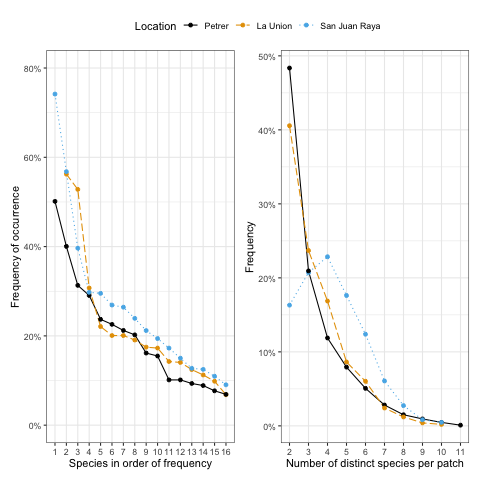

In [ ]:
%%R

p = (p2 | p1) +
  plot_layout(guides = 'collect') &
  theme(legend.position = 'top') &
  labs(color=label, linetype=label)

save_plot('populations', width=8, height=5)

p